# Funciones objetivo para minimización

En esta libreta se implementan algunas funciones para probar algoritmos de optmización

In [1]:
# Manejo de arreglos y operaciones matematicas
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Implementación de funciones

En esta sección se implementan diversas funciones objetivo para probar el algoritmo

In [2]:
def f_spherical(x):
    """
    Función objetivo: (x1^2 + x2^2 x3^2 + ... + xn^2)
    input: arreglo de numpy con los valores decodificados de la población
    output: fitness de la población
    """
    # Variable para ir guardando el valor de la suma de la funcion objetivo
    fitness = 0
    for i in range(x.shape[1]):
        fitness += x[:, i] ** 2  # Sumar la iésima dimensión al cueadrado
    return fitness

def f_quadric(x):
    # Variable para ir guardando el valor del fitness
    fitness = 0
    for j in range(x.shape[1]):
        # Variable para guardar el valor de la suma interna
        sum1 = 0
        for k in range(j+1):
            sum1 += x[:, k]
        fitness += sum1**2
    return fitness

def f_ackley(x):
    # Variable para guardar la suma de los cuadrados
    sum1 = 0
    # Variable para guardar la suma de los cosenos
    sum2 = 0
    for i in range(x.shape[1]):
        sum1 += x[:, i] ** 2
        sum2 += np.cos(2 * np.pi * x[:, i])
    fitness = -20 * np.exp(-0.2 * np.sqrt(sum1 / x.shape[1])) - np.exp(sum2 / x.shape[1]) + 20 + np.e
    return fitness

def f_bohachevsky(x):
    if x.shape[1] != 2:
        print("Esta funcion solo es en dos dimensiones")
        return
    return x[:, 0]**2 + 2 * x[:, 1]**2 - 0.3 * np.cos(3 * x[:, 0]) - 0.4 * np.cos(4 * x[:, 1]) + 0.7

def f_colville(x):
    if x.shape[1] != 4:
        print("Esta funcion solo es en cuatro dimensiones")
        return
    fitness = 100 * (x[:, 1] - x[:, 0]**2)**2 + (1 - x[:, 0])**2 + 90 * (x[:, 3] - x[:, 2]**2)**2 + (1 - x[:, 2])**2 + 10.1 * ((x[:, 1] - 1)**2 + (x[:, 3] - 1)**2) + 19.8 * (x[:, 1] - 1) * (x[:, 3] - 1)
    return fitness

def f_easom(x):
    if x.shape[1] != 2:
        print("Esta funcion solo es en dos dimensiones")
        return
    return - np.cos(x[:, 0]) * np.cos(x[:, 1]) * np.exp(-(x[:, 0] - np.pi)**2 - (x[:, 1] - np.pi)**2)

def f_griewank(x):
    # Variable para guardar la suma de los cuadrados
    sumc = 0
    # Variable para guardar la multiplicatoria de los cosenos
    prod = 1
    for j in range(x.shape[1]):
        sumc += x[:, j]**2
        prod *= np.cos(x[:, j] / (j+1))
    return 1 + 1/4000 * sumc - prod

def f_hyperellipsoid(x):
    # Variable para ir guardando el valor de la suma de la funcion objetivo
    fitness = 0
    for i in range(x.shape[1]):
        fitness += (i+1) * x[:, i] ** 2  # Sumar la iésima dimensión al cueadrado
    return fitness

def f_rastrigin(x):
    # Variable para ir guardando el fitness
    fitness = 0
    for i in range(x.shape[1]):
        fitness += x[:, i]**2 - 10 * np.cos(2 * np.pi * x[:, i]) + 10
    return fitness

def f_rosenbrock(x):
    # Variable para ir guardando la suma
    fitness = 0
    for i in range(1, int(x.shape[1]/2) + 1):
        fitness += 100 * (x[:, (2*i)-1] - x[:, (2*i-1)-1]**2)**2 + (1 + x[:, (2*i-1)-1]**2)
    return fitness

def f_schwefel(x):
    # Variable para guardar la suma 
    suma = 0
    for i in range(x.shape[1]):
        suma += (x[:, i] * np.sin(np.sqrt(np.abs(x[:, i]))))
    return -suma + 418.9829 * x.shape[1]

## Funcion para graficar las funciones

In [3]:
def graficar(f, rango=[[-1, 1]], n=1000, min=None):
    """
    Funcion para graficar las funciones objetivo en 3D
    input:
        - f: funcion a graficar
        - rango: rango en el que se graficara la funcion, puede ser un rango para cada variable o el mismo para todas
                 si solo se pasa un rango, se asume el mismo para todas
        - n: numero de puntos para graficar, esta es la resolucion de la grafica
        - min: en caso de que lo haya, miniimo de la funcion para graficarlo sobre esta
    """
    # Si solo se pasa un rango, se le asigna el mismo rango a todas las variables
    if len(rango) == 1:
        rango = rango * 2
    
    # Si la funcion es mayor a 3D, no se puede graficar
    elif len(rango) > 2:
        print("No se pueden graficar funciones de mas de 3 dimensiones")
        return
    # Definir x1, x2
    x1 = np.linspace(rango[0][0], rango[0][1], n)  # Cambiar esto a un rango dado
    x2 = np.linspace(rango[1][0], rango[1][1], n)
    # Crear malla para la superficie
    X1, X2 = np.meshgrid(x1, x2)

    # Poner x1 y y1 en una matriz para pasarlas a las funciones
    X1.flatten()

    x = np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1)))

    # Obtener los valores de x3
    X3 = f(x).reshape(n, n)

    # Crear la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar la superficie
    surf = ax.plot_surface(X1, X2, X3, cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
    
    # ---------- Añadir la opcion para graficar el minimo de la funcion sobre la misma grafica ------------------

    plt.show()

## Mostrar la gráfica de cada función

### Spherical

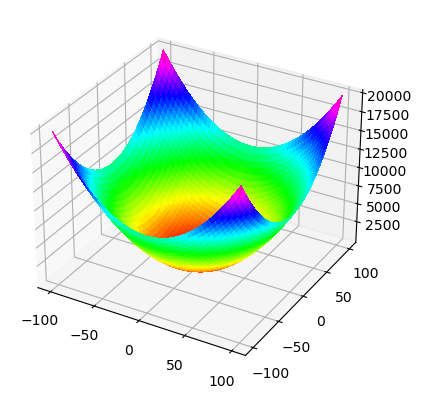

In [4]:
graficar(f_spherical, rango=[[-100, 100]])

### Quadric

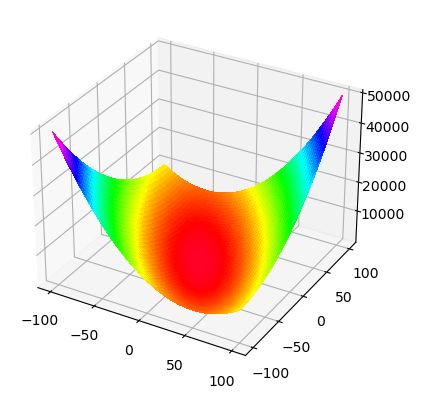

In [5]:
graficar(f_quadric, rango=[[-100, 100]])

### Ackley

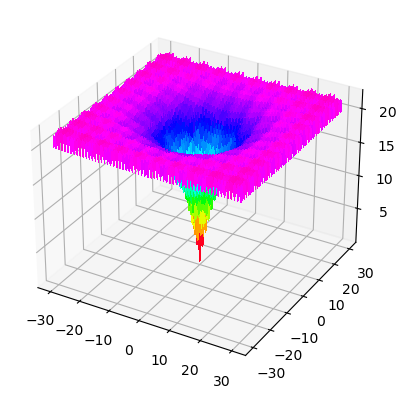

In [6]:
graficar(f_ackley, rango=[[-30, 30]])

### Bohachvsky 1

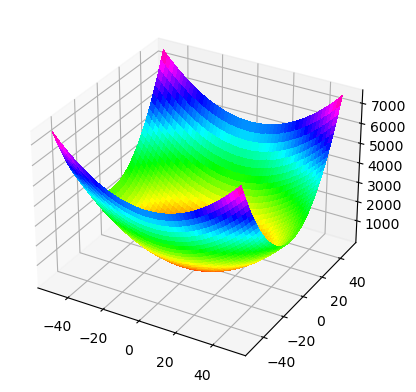

In [7]:
graficar(f_bohachevsky, rango=[[-50, 50]])

### Easom

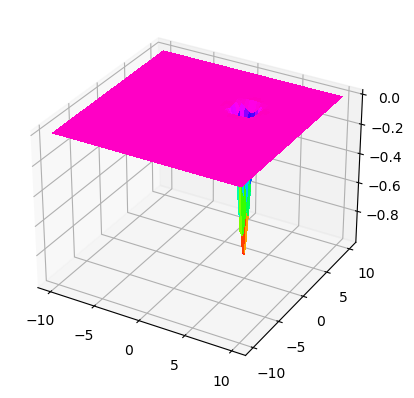

In [8]:
graficar(f_easom, rango=[[-10, 10]])  # El rango es de -100 a 100

### Griewank

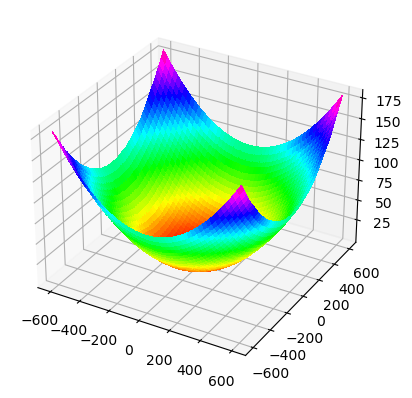

In [9]:
graficar(f_griewank, rango=[[-600, 600]])

### Hyperellipsoid

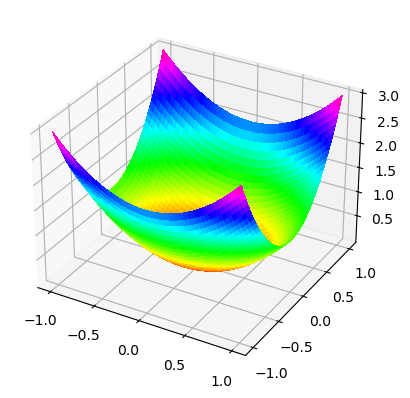

In [10]:
graficar(f_hyperellipsoid)  # El rango default es de [-1, 1]

### Rastrigin

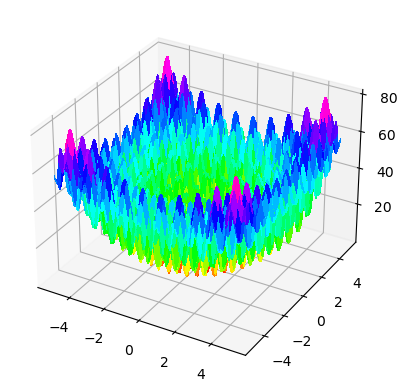

In [11]:
graficar(f_rastrigin, rango=[[-5.12, 5.12]])

### Rosenbrock

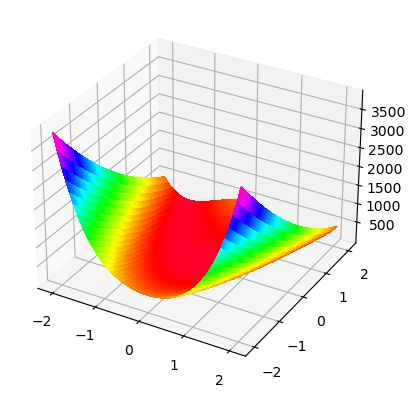

In [12]:
graficar(f_rosenbrock, rango=[[-2.048, 2.048]])

### Schwefel

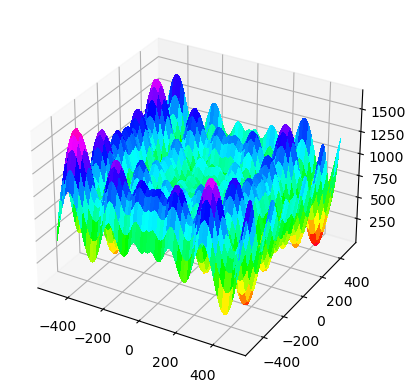

In [13]:
graficar(f_schwefel, rango=[[-500, 500]])